# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 575


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}&units=metric"
    
    # Log the url, record, and set numbers
    print(f"Processing Record {record_count} of Set {set_count} | {city}")

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ribeira grande
Processing Record 2 of Set 1 | daru
Processing Record 3 of Set 1 | kodiak
Processing Record 4 of Set 1 | utrik
Processing Record 5 of Set 1 | tiksi
Processing Record 6 of Set 1 | hithadhoo
Processing Record 7 of Set 1 | wailua homesteads
Processing Record 8 of Set 1 | aripuana
Processing Record 9 of Set 1 | komsomol'sk
Processing Record 10 of Set 1 | kisangani
Processing Record 11 of Set 1 | waitangi
Processing Record 12 of Set 1 | puerto natales
Processing Record 13 of Set 1 | ushuaia
Processing Record 14 of Set 1 | remire-montjoly
Processing Record 15 of Set 1 | uturoa
Processing Record 16 of Set 1 | yuzhno-kurilsk
Processing Record 17 of Set 1 | college
Processing Record 18 of Set 1 | zhangye
Processing Record 19 of Set 1 | nikolayevsk-on-amure
Processing Record 20 of Set 1 | olonkinbyen
Processing Record 21 of Set 1 | punta arenas
Processing Record 22 of Set 1 | bilibino
Proces

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          546
Lat           546
Lng           546
Max Temp      546
Humidity      546
Cloudiness    546
Wind Speed    546
Country       546
Date          546
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ribeira grande,38.5167,-28.7000,18.21,95,100,8.05,PT,1707198632
1,daru,-9.0763,143.2092,29.23,78,100,2.72,PG,1707198632
2,kodiak,57.7900,-152.4072,0.73,80,0,2.06,US,1707198632
3,utrik,11.2278,169.8474,26.50,84,32,8.63,MH,1707198633
4,tiksi,71.6872,128.8694,-26.04,89,99,1.48,RU,1707198633


In [6]:
# Export the City_Data into a csv
#city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")
output_file_path = "../output_data/cities.csv"
city_data_df.to_csv(output_file_path, index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ribeira grande,38.5167,-28.7000,18.21,95,100,8.05,PT,1707198632
1,daru,-9.0763,143.2092,29.23,78,100,2.72,PG,1707198632
2,kodiak,57.7900,-152.4072,0.73,80,0,2.06,US,1707198632
3,utrik,11.2278,169.8474,26.50,84,32,8.63,MH,1707198633
4,tiksi,71.6872,128.8694,-26.04,89,99,1.48,RU,1707198633


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

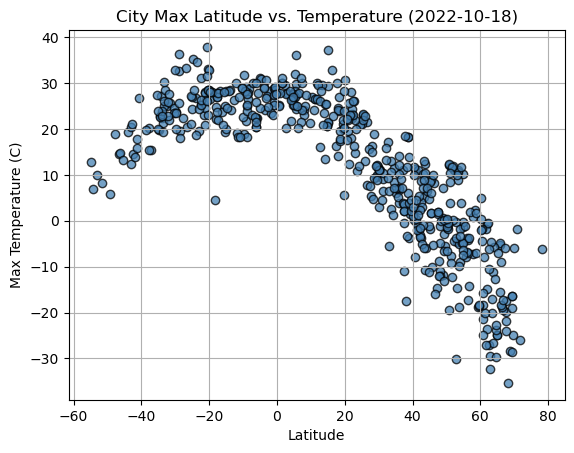

In [8]:
# Build scatter plot for latitude vs. temperature with SteelBlue colored markers
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="black", facecolors="SteelBlue", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1a.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

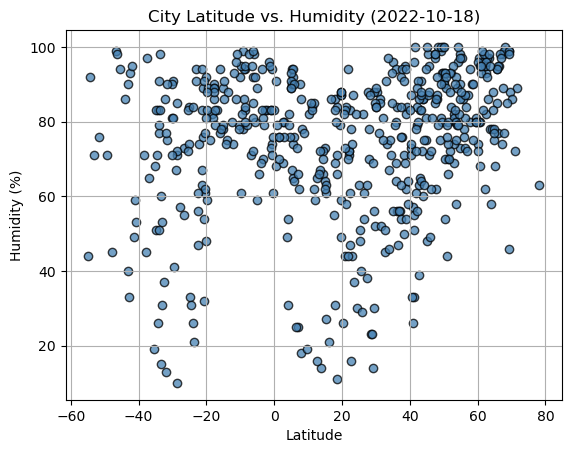

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black", facecolors="SteelBlue", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2a.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

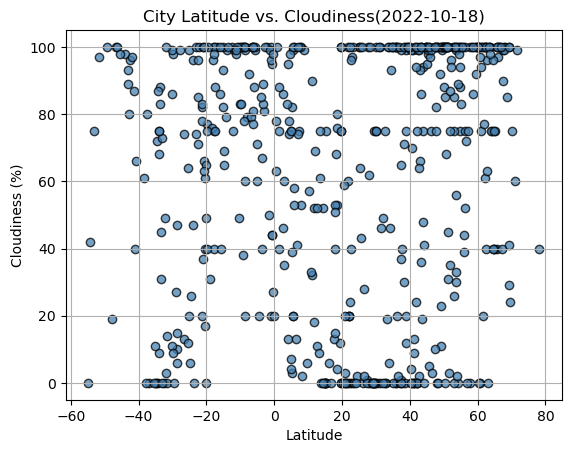

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black", facecolors="SteelBlue", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness(2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3a.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

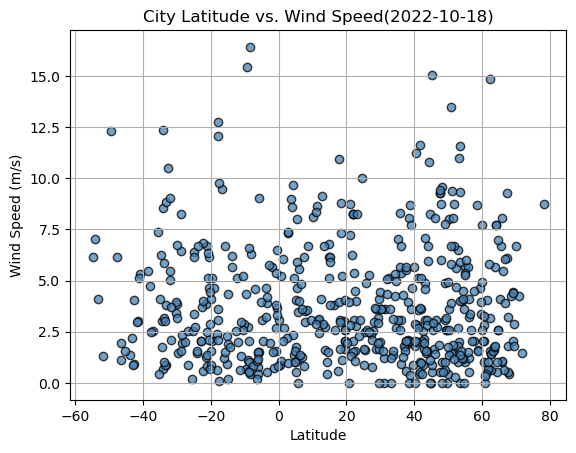

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black", facecolors="SteelBlue", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed(2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4a.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, xlabel, ylabel, output_path):
    #Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept

    #Create line equation
    line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))

    #Create scatter plot
    plt.scatter(x_values, y_values, edgecolors="black", facecolors="SteelBlue", alpha=0.75)

    #Plot regression line
    plt.plot(x_values, regress_values, "r-")

    #Annotate the line equation on the plot
    plt.annotate(line_eq, (min(x_values), min(y_values)), fontsize=15, color="red")

    #Label plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)

   #Print R-squared value
    print(f"The r-value is: {rvalue**2:.16f}")

    #Show plot
    plt.show()


In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ribeira grande,38.5167,-28.7000,18.21,95,100,8.05,PT,1707198632
2,kodiak,57.7900,-152.4072,0.73,80,0,2.06,US,1707198632
3,utrik,11.2278,169.8474,26.50,84,32,8.63,MH,1707198633
4,tiksi,71.6872,128.8694,-26.04,89,99,1.48,RU,1707198633
6,wailua homesteads,22.0669,-159.3780,22.44,72,20,8.23,US,1707198633


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,daru,-9.0763,143.2092,29.23,78,100,2.72,PG,1707198632
5,hithadhoo,-0.6000,73.0833,28.36,74,44,3.67,MV,1707198633
7,aripuana,-9.1667,-60.6333,21.78,99,38,1.13,BR,1707198634
10,waitangi,-43.9535,-176.5597,19.34,86,98,1.34,NZ,1707198634
11,puerto natales,-51.7236,-72.4875,8.13,76,97,1.32,CL,1707198635


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7735404781034244


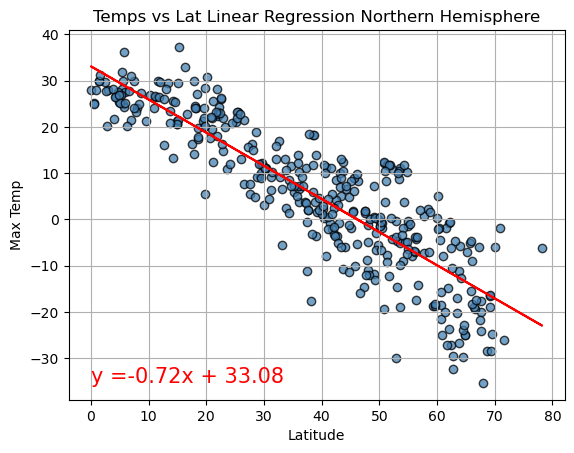

In [15]:
# Linear regression on Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], "Temps vs Lat Linear Regression Northern Hemisphere", "Latitude", "Max Temp", "../output_data/Northern_Hemisphere_MaxTemp_regression1.png")

The r-value is: 0.2450637234024924


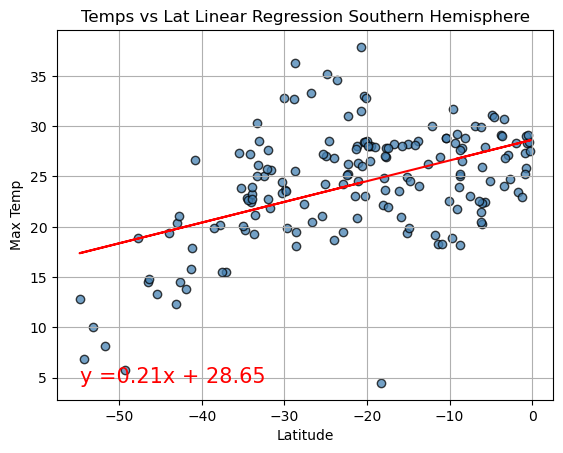

In [16]:
# Linear regression on Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], "Temps vs Lat Linear Regression Southern Hemisphere", "Latitude", "Max Temp", "../output_data/southern_hemi_df_MaxTemp_regression1.png")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.1307679288100109


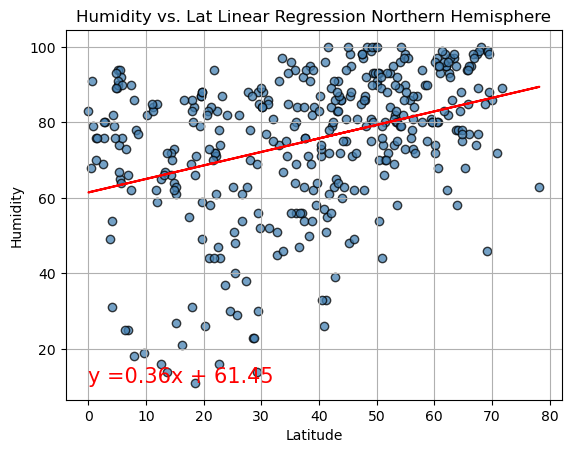

In [17]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], "Humidity vs. Lat Linear Regression Northern Hemisphere", "Latitude", "Humidity", "../output_data/N_Hemisphere_Hum_regression1.png")

The r-value is: 0.0983332589277802


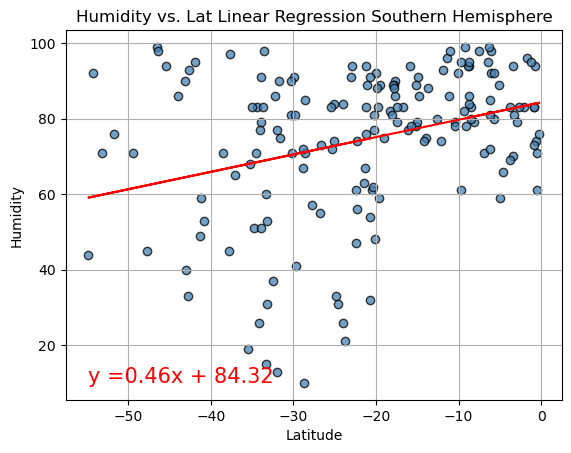

In [18]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], "Humidity vs. Lat Linear Regression Southern Hemisphere", "Latitude", "Humidity", "../output_data/S_Hemisphere_Hum_regression1.png")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.0847236276448099


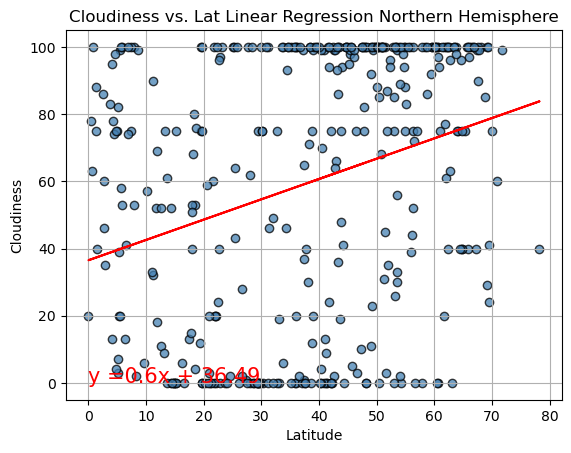

In [19]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], "Cloudiness vs. Lat Linear Regression Northern Hemisphere", "Latitude", "Cloudiness", "../output_data/N_Hemisphere_Cloud_regression1.png")

The r-value is: 0.0756431794821097


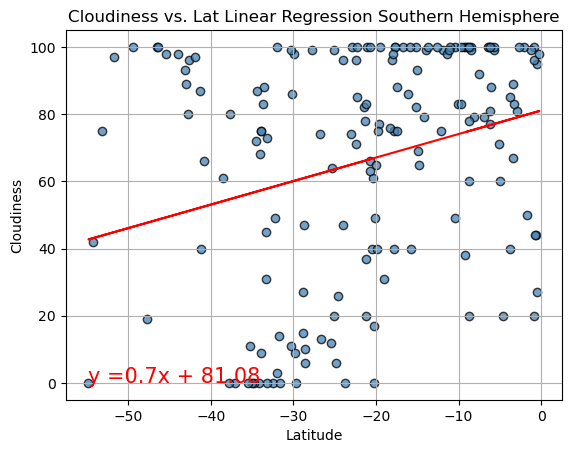

In [20]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], "Cloudiness vs. Lat Linear Regression Southern Hemisphere", "Latitude", "Cloudiness", "../output_data/S_Hemisphere_Cloud_regression1.png")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.0004589028093696


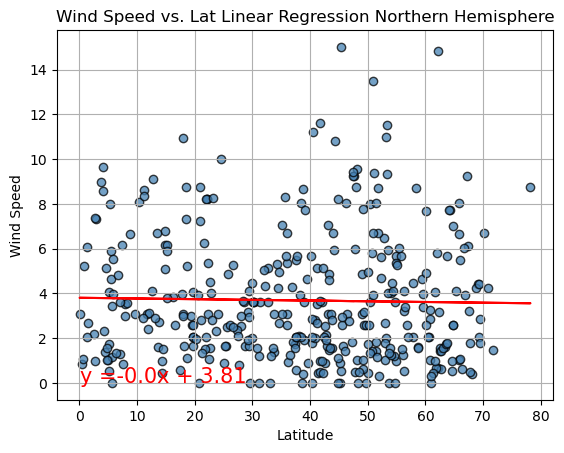

In [21]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], "Wind Speed vs. Lat Linear Regression Northern Hemisphere", "Latitude", "Wind Speed", "../output_data/N_Hemisphere_WS_regression1.png")

The r-value is: 0.0115057553217824


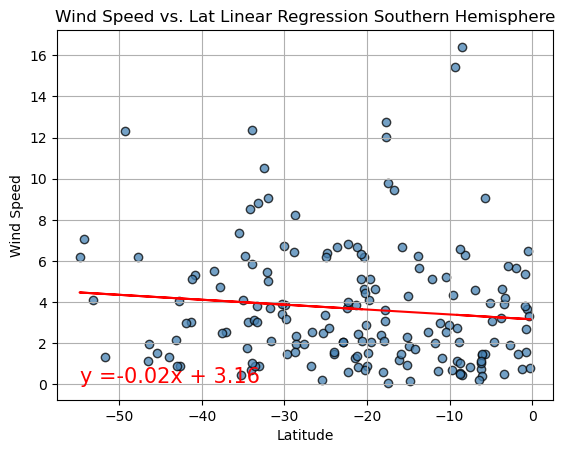

In [22]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], "Wind Speed vs. Lat Linear Regression Southern Hemisphere", "Latitude", "Wind Speed", "../output_data/S_Hemisphere_WS_regression1.png")

**Discussion about the linear relationship:** YOUR RESPONSE HERE